In [ ]:
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D , Flatten
from keras.optimizers import SGD
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint

In [ ]:
def load_dataset():
  # load dataset
  (trainX , trainY) , (testX, testY) = mnist.load_data()
  #reshape dataset to have a single channel
  trainX = trainX.reshape((trainX.shape[0] , 28 , 28 , 1))
  testX = testX.reshape((testX.shape[0] ,  28 , 28 ,1))
  trainY = to_categorical(trainY)
  testY =  to_categorical(testY)
  return trainX , trainY ,testX ,testY 


In [ ]:
trainX , trainY ,testX ,testY = load_dataset()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
def prep_pixels(train, test):
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  train_norm =  train_norm / 255.0
  test_norm = test_norm/2555.0
  return train_norm , test_norm

In [ ]:
trainX,  testX = prep_pixels(trainX , testX)

In [ ]:
def define_model():
  model =Sequential()
  model.add(Conv2D(32 , (3,3) ,  activation = 'relu' ,  kernel_initializer= 'he_uniform' , input_shape=(28,28,1) ))
  model.add(MaxPooling2D((2 , 2)))
  model.add(Flatten())
  model.add(Dense(100 , activation = 'relu' , kernel_initializer = 'he_uniform' ))
  model.add(Dense(10, activation = 'softmax'))
  opt =  SGD(lr = 0.01 , momentum = 0.9)
  model.compile(optimizer = opt , loss =  'categorical_crossentropy'  , metrics = ['accuracy'])
  return model
  

In [ ]:
model = define_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               540900    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history =  model.fit(trainX , trainY ,  epochs = 25 ,  batch_size =  128 , validation_data = (testX , testY) , verbose = 1)

Epoch 1/25
469/469 [==============================] - 22s 47ms/step - loss: 0.4905 - accuracy: 0.8490 - val_loss: 1.8168 - val_accuracy: 0.7058
Epoch 2/25
469/469 [==============================] - 22s 47ms/step - loss: 0.1251 - accuracy: 0.9626 - val_loss: 2.0102 - val_accuracy: 0.4186
Epoch 3/25
469/469 [==============================] - 22s 47ms/step - loss: 0.0813 - accuracy: 0.9764 - val_loss: 2.1991 - val_accuracy: 0.3519
Epoch 4/25
469/469 [==============================] - 22s 47ms/step - loss: 0.0590 - accuracy: 0.9828 - val_loss: 2.3457 - val_accuracy: 0.1849
Epoch 5/25
469/469 [==============================] - 22s 47ms/step - loss: 0.0488 - accuracy: 0.9856 - val_loss: 2.4926 - val_accuracy: 0.1353
Epoch 6/25
469/469 [==============================] - 22s 46ms/step - loss: 0.0389 - accuracy: 0.9894 - val_loss: 2.5350 - val_accuracy: 0.1785
Epoch 7/25
469/469 [==============================] - 22s 46ms/step - loss: 0.0345 - accuracy: 0.9902 - val_loss: 2.6415 - val_accuracy:

In [ ]:
loss ,  accuracy = model.evaluate(testX ,  testY , verbose = True)

313/313 [==============================] - 1s 3ms/step - loss: 2.7986 - accuracy: 0.1417


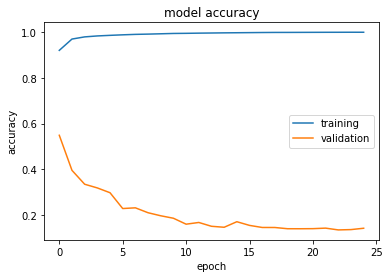

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training' , 'validation'] , loc = 'best')
plt.show()

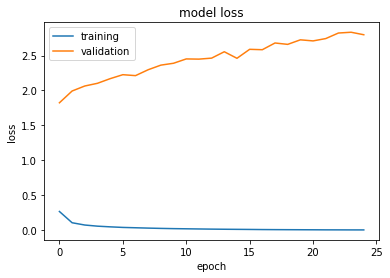

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training' , 'validation'] , loc = 'best')
plt.show()

In [ ]:
y_pred = model.predict(testX)
Y_pred = np.argmax(testY, 1)
Y_test = np.argmax(testY , 1)
mat =  confusion_matrix(Y_test , Y_pred)
print(mat)

[[ 980    0    0    0    0    0    0    0    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0    0 1032    0    0    0    0    0    0    0]
 [   0    0    0 1010    0    0    0    0    0    0]
 [   0    0    0    0  982    0    0    0    0    0]
 [   0    0    0    0    0  892    0    0    0    0]
 [   0    0    0    0    0    0  958    0    0    0]
 [   0    0    0    0    0    0    0 1028    0    0]
 [   0    0    0    0    0    0    0    0  974    0]
 [   0    0    0    0    0    0    0    0    0 1009]]
